**Review of parameter tuning using cross_val_score**

Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

Goal : **To select the best value of k for KNN model to predict species**





In [0]:
# imports 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


In [6]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [25]:
# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

0.9533333333333334


In [26]:
print(scores.std())

0.04268749491621898


This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance.

In [8]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

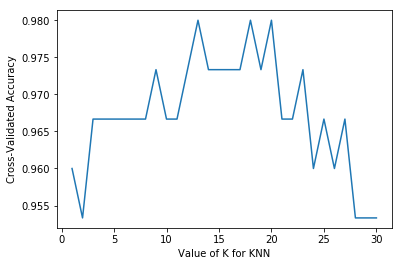

In [9]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

**More efficient parameter tuning using GridSearchCV**

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

*This is like an automated version of the "for loop" above*

In [0]:
from sklearn.model_selection import GridSearchCV

In [12]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [13]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [0]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric

In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times

You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)
This is also called parallel programming

In [16]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Remember this is running 10-fold validation 30 times

KNN model is being fit and predictions are being made 30 x 10 = 300 times

In [18]:
# view the complete results (list of named tuples)
grid.best_params_

{'n_neighbors': 13}

In [27]:
print(grid.best_score_)  

0.98


In [20]:
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:
0.960 (+/-0.107) for {'n_neighbors': 1}
0.953 (+/-0.104) for {'n_neighbors': 2}
0.967 (+/-0.089) for {'n_neighbors': 3}
0.967 (+/-0.089) for {'n_neighbors': 4}
0.967 (+/-0.089) for {'n_neighbors': 5}
0.967 (+/-0.089) for {'n_neighbors': 6}
0.967 (+/-0.089) for {'n_neighbors': 7}
0.967 (+/-0.089) for {'n_neighbors': 8}
0.973 (+/-0.065) for {'n_neighbors': 9}
0.967 (+/-0.089) for {'n_neighbors': 10}
0.967 (+/-0.089) for {'n_neighbors': 11}
0.973 (+/-0.065) for {'n_neighbors': 12}
0.980 (+/-0.061) for {'n_neighbors': 13}
0.973 (+/-0.088) for {'n_neighbors': 14}
0.973 (+/-0.065) for {'n_neighbors': 15}
0.973 (+/-0.065) for {'n_neighbors': 16}
0.973 (+/-0.065) for {'n_neighbors': 17}
0.980 (+/-0.061) for {'n_neighbors': 18}
0.973 (+/-0.065) for {'n_neighbors': 19}
0.980 (+/-0.061) for {'n_neighbors': 20}
0.967 (+/-0.067) for {'n_neighbors': 21}
0.967 (+/-0.067) for {'n_neighbors': 22}
0.973 (+/-0.065) for {'n_neighbors': 23}
0.960 (+/-0.088) for {'n_neighbors

If SD is high, the cross-validated estimate of the accuracy might not be as reliable

In [28]:
print(means)

array([0.96      , 0.95333333, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
       0.96666667, 0.97333333, 0.98      , 0.97333333, 0.97333333,
       0.97333333, 0.97333333, 0.98      , 0.97333333, 0.98      ,
       0.96666667, 0.96666667, 0.97333333, 0.96      , 0.96666667,
       0.96      , 0.96666667, 0.95333333, 0.95333333, 0.95333333])

Text(0, 0.5, 'Cross-Validated Accuracy')

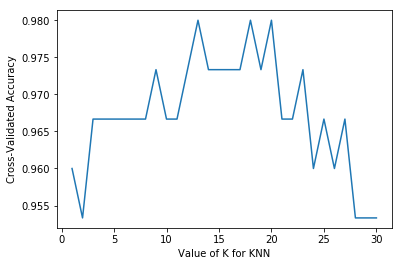

In [29]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [30]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


In [0]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [32]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [33]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
print("Grid scores on development set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:
0.960 (+/-0.107) for {'n_neighbors': 1, 'weights': 'uniform'}
0.960 (+/-0.107) for {'n_neighbors': 1, 'weights': 'distance'}
0.953 (+/-0.104) for {'n_neighbors': 2, 'weights': 'uniform'}
0.960 (+/-0.107) for {'n_neighbors': 2, 'weights': 'distance'}
0.967 (+/-0.089) for {'n_neighbors': 3, 'weights': 'uniform'}
0.967 (+/-0.089) for {'n_neighbors': 3, 'weights': 'distance'}
0.967 (+/-0.089) for {'n_neighbors': 4, 'weights': 'uniform'}
0.967 (+/-0.089) for {'n_neighbors': 4, 'weights': 'distance'}
0.967 (+/-0.089) for {'n_neighbors': 5, 'weights': 'uniform'}
0.967 (+/-0.089) for {'n_neighbors': 5, 'weights': 'distance'}
0.967 (+/-0.089) for {'n_neighbors': 6, 'weights': 'uniform'}
0.967 (+/-0.089) for {'n_neighbors': 6, 'weights': 'distance'}
0.967 (+/-0.089) for {'n_neighbors': 7, 'weights': 'uniform'}
0.967 (+/-0.089) for {'n_neighbors': 7, 'weights': 'distance'}
0.967 (+/-0.089) for {'n_neighbors': 8, 'weights': 'uniform'}
0.967 (+/-0.089) for {'n_neighb

In [35]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Best score did not improve for this model

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


** Using the best parameters to make predictions**

In [37]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [39]:
# shortcut: 
# GridSearchCV automatically refits the best model using all of the data
# that best fitted model is stored in grid object 
# we can then use prediction using the best fitted model
# code in this cell is the same as the top

grid.predict([[3, 5, 4, 2]])

array([1])

**Reducing computational expense using RandomizedSearchCV**

This is a close cousin to GridSearchCV

Searching many different parameters at once may be computationally infeasible

*For example*
Searching 10 parameters (each range of 1000) - Require 10,000 trials of CV, 100,000 model fits with 10-fold CV, 100,000 predictions with 10-fold CV, RandomizedSearchCV searches a subset of the parameters, and you control the computational "budget"

You can decide how long you want it to run for depending on the computational time we have

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# if parameters are continuous (like regularization)

#Important: Specify a continuous distribution (rather than a list of values) for any continous parameters

In [0]:
# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [52]:
# fit
rand.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [54]:
print("Grid scores on development set:")
means = rand.cv_results_['mean_test_score']
stds = rand.cv_results_['std_test_score']

#THIS IS WHAT YOU WANT
for mean, std, params in zip(means, stds, rand.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Grid scores on development set:
0.973 (+/-0.065) for {'weights': 'distance', 'n_neighbors': 16}
0.967 (+/-0.067) for {'weights': 'uniform', 'n_neighbors': 22}
0.980 (+/-0.061) for {'weights': 'uniform', 'n_neighbors': 18}
0.967 (+/-0.089) for {'weights': 'uniform', 'n_neighbors': 27}
0.953 (+/-0.085) for {'weights': 'uniform', 'n_neighbors': 29}
0.973 (+/-0.065) for {'weights': 'distance', 'n_neighbors': 10}
0.967 (+/-0.089) for {'weights': 'distance', 'n_neighbors': 22}
0.973 (+/-0.088) for {'weights': 'uniform', 'n_neighbors': 14}
0.973 (+/-0.088) for {'weights': 'distance', 'n_neighbors': 12}
0.973 (+/-0.065) for {'weights': 'uniform', 'n_neighbors': 15}


In [56]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)
print(rand.best_estimator_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')


In [57]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score

best_scores = []

for _ in list(range(20)):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(rand.best_score_)

print(best_scores)

[0.98, 0.98, 0.98, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.98, 0.9733333333333334, 0.98, 0.98, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.98, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98]
